<a href="https://colab.research.google.com/github/jamelof23/Quantimxx/blob/main/amplitude_encoding_hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classical Data Encoding using Amplitude Encoding

## Objective
We demonstrate how to encode classical data into the **amplitudes** of a quantum state vector, normalize the state, convert it into a quantum circuit, and transpile the circuit into a gate set consisting of u1, u2, u3, and CNOT gates.

## Amplitude Encoding Explanation
This method follows **amplitude encoding** because the classical data values are mapped into the amplitudes of the quantum state, see the [glossary](https://pennylane.ai/qml/glossary/quantum_embedding) for details.

### Why is this Amplitude Encoding?
- In **amplitude encoding**, classical data is represented by the amplitudes of the quantum state vector rather than basis states.
- The state vector is constructed such that the classical values are encoded as the probability amplitudes of the quantum system.
- The final quantum state is a **superposition** of basis states with amplitudes determined by the classical data.

### Breakdown of Encoding in This Lab:
1. **Constructing the State Vector (Classical Data to Amplitudes Mapping):**
   - The state vector elements are set to correspond to the normalized classical data.
   - The state is **normalized** to ensure it remains a valid quantum state.

2. **Final Quantum State:**
   - The system is now in a **superposition** where each basis state has an amplitude representing the encoded data.



## Setup

In [ ]:
! pip install -q qiskit==1.3.1 pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.6 MB/s eta 0:00:00


## Step 1: Define the Classical Data and Encode into State Vector

### Mapping Classical Data to Amplitudes

In this example, we select the data `[3, 1, 4, 1]` and map it to a 2-qubit quantum state using amplitude encoding.

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector

# --- Step 1: Define the Classical Data and Encode into State Vector ---
# Example dataset
classical_data = np.array([3, 1, 4, 1], dtype=float)

# Normalize the data to create a valid quantum state
state_vector = classical_data / np.linalg.norm(classical_data)

# Display the normalized state vector
print("Normalized State Vector:")
print(state_vector)


Normalized State Vector:
[0.57735027 0.19245009 0.76980036 0.19245009]


## Step 2: Convert the State Vector into a Quantum Circuit

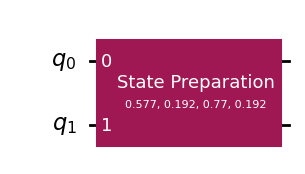

In [ ]:
num_qubits = int(np.ceil(np.log2(len(state_vector))))
qc = QuantumCircuit(num_qubits)
initial_state = Statevector(state_vector)
qc.prepare_state(initial_state, range(num_qubits))

# visualize the Circuit
qc.draw(output='mpl')

##  Step 3: Transpile the Circuit into u1, u2, u3, and CNOT Gates
This process is typically exponentially complex because it involves decomposing arbitrary quantum operations into a limited set of elementary gates. For comparison of algorithms please see [this](https://arxiv.org/abs/2407.15745) paper.

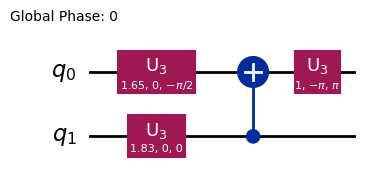

In [ ]:
transpiled_circuit = transpile(qc, basis_gates=['u1', 'u2', 'u3', 'cx'])

# Display the transpiled circuit
transpiled_circuit.draw(output='mpl')
